In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
raw_data = pd.read_csv("../Processed Datasets/cancer_rate_new.csv")
raw_data.columns = ['Year', 'Cancer Rate']
raw_data.head()

,Year,Cancer Rate
0,1975,7.7677
1,1976,8.2232
2,1977,8.7055
3,1978,9.2160
4,1979,9.7565


In [44]:
raw_data.drop_duplicates(subset="Year", keep="first", inplace=True)
data = raw_data.copy()
data["date"] = pd.to_datetime(data["Year"], format="%Y").dt.normalize()
data.set_index(data["date"], inplace=True)
data.index

DatetimeIndex(['1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [45]:
data.head()

,Year,Cancer Rate,date
date,,,
1975-01-01,1975,7.7677,1975-01-01
1976-01-01,1976,8.2232,1976-01-01
1977-01-01,1977,8.7055,1977-01-01
1978-01-01,1978,9.2160,1978-01-01
1979-01-01,1979,9.7565,1979-01-01


In [46]:
cols = ["Year", "date"]
data.drop(cols, axis=1, inplace=True)
data.head()

,Cancer Rate
date,
1975-01-01,7.7677
1976-01-01,8.2232
1977-01-01,8.7055
1978-01-01,9.2160
1979-01-01,9.7565


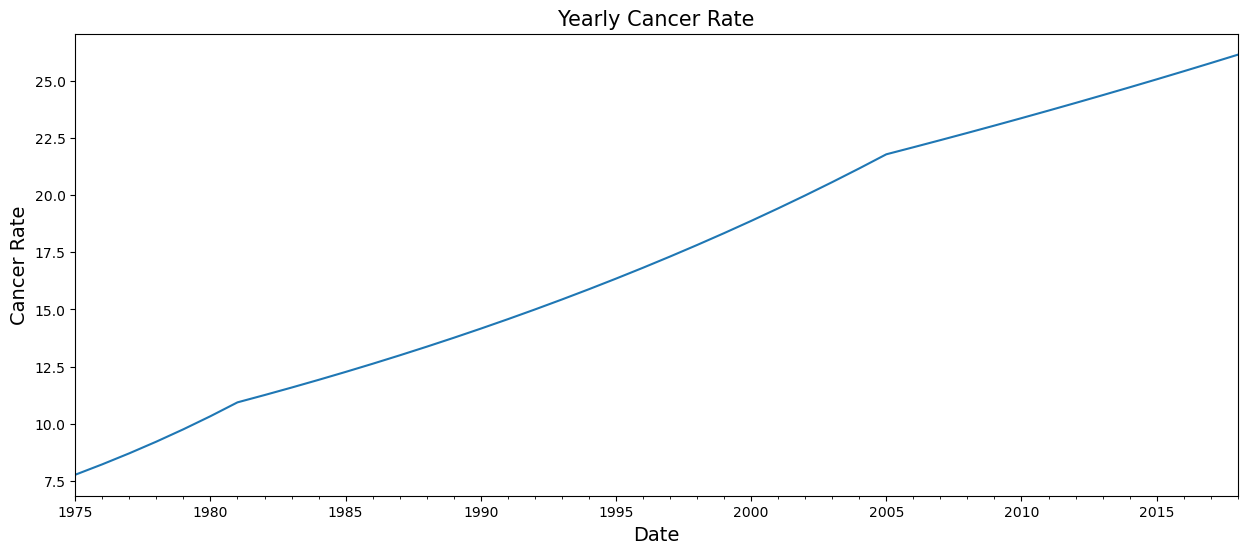

In [47]:
data.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Cancer Rate', fontsize = 14)
plt.title('Yearly Cancer Rate', fontsize = 15)
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -0.936078
p-value                         0.775859
No. of Lags Used                1.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [52]:
data["Cancer Rate"] = data["Cancer Rate"].diff()
data.dropna(inplace=True)
data.head()
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                -7.359164e+00
p-value                        9.601597e-11
No. of Lags Used               1.000000e+00
Number of Observations Used    3.900000e+01
Critical Value (1%)           -3.610400e+00
Critical Value (5%)           -2.939109e+00
Critical Value (10%)          -2.608063e+00
dtype: float64


In [49]:
train = data[:int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]
print(train)
print(test)

            Cancer Rate
date                   
1975-01-01       7.7677
1976-01-01       8.2232
1977-01-01       8.7055
1978-01-01       9.2160
1979-01-01       9.7565
1980-01-01      10.3286
1981-01-01      10.9343
1982-01-01      11.2530
1983-01-01      11.5809
1984-01-01      11.9184
1985-01-01      12.2658
1986-01-01      12.6232
1987-01-01      12.9911
1988-01-01      13.3697
1989-01-01      13.7593
1990-01-01      14.1603
1991-01-01      14.5730
1992-01-01      14.9977
1993-01-01      15.4348
1994-01-01      15.8846
1995-01-01      16.3475
1996-01-01      16.8239
1997-01-01      17.3143
1998-01-01      17.8188
1999-01-01      18.3381
2000-01-01      18.8726
2001-01-01      19.4226
2002-01-01      19.9886
2003-01-01      20.5711
2004-01-01      21.1707
2005-01-01      21.7876
2006-01-01      22.0953
2007-01-01      22.4073
2008-01-01      22.7237
2009-01-01      23.0446
            Cancer Rate
date                   
2010-01-01      23.3700
2011-01-01      23.7000
2012-01-01      